In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
from pandas import Series
from scipy.optimize import curve_fit

In [131]:
df1 = pd.read_csv('Goldrush/SpinDown_30min_D11_25_2013.txt', sep='\t', names=["index","time",'signal','T2','freq','phase','offset'])
df1['signal'] = np.abs(df1['signal'])
df1['time'] = df1['index'] / 2.
df2 = pd.read_csv('Goldrush/SpinDown_30min_D11_27_2013.txt', sep='\t', names=["index","time",'signal','T2','freq','phase','offset'])
df2['signal'] = np.abs(df2['signal'])
df2['time'] = df2['index'] / 2.
df3 = pd.read_csv('Goldrush/SpinDown_30min_D11_29_2013.txt', sep='\t', names=["index","time",'signal','T2','freq','phase','offset'])
df3['signal'] = np.abs(df3['signal'])
df3['time'] = df3['index'] / 2.
df4 = pd.read_csv('Goldrush/SpinDown_30min_D12_01_2013.txt', sep='\t', names=["index","time",'signal','T2','freq','phase','offset'])
df4['signal'] = np.abs(df4['signal'])
df4['time'] = df4['index'] / 2.

In [132]:
def exp_fit(x, a, t):
    return a * np.exp(-x / t)

In [133]:
print df1.ix[df1.ix[:, 1].isnull() | df1.ix[:, 2].isnull(), :]
print df2.ix[df2.ix[:, 1].isnull() | df2.ix[:, 2].isnull(), :]
print df3.ix[df3.ix[:, 1].isnull() | df3.ix[:, 2].isnull(), :]
print df4.ix[df2.ix[:, 1].isnull() | df4.ix[:, 2].isnull(), :]
df2=df2.dropna()
df3=df3.dropna()
df4=df4.dropna()
df1 = df1.ix[3:,:]
df2 = df2.drop(24)

Empty DataFrame
Columns: [index, time, signal, T2, freq, phase, offset]
Index: []
Empty DataFrame
Columns: [index, time, signal, T2, freq, phase, offset]
Index: []
Empty DataFrame
Columns: [index, time, signal, T2, freq, phase, offset]
Index: []
Empty DataFrame
Columns: [index, time, signal, T2, freq, phase, offset]
Index: []


In [134]:
dfs = [df1, df2, df3, df4]
print dfs[0].head()
print dfs[1].head()

   index  time    signal        T2       freq     phase    offset
3    4.0   2.0  2.827250  0.139065  24.471217 -0.506445  0.010118
4    5.0   2.5  2.648793  0.143108  23.723971 -0.052681  0.009230
5    6.0   3.0  2.549799  0.141791  23.333745  0.209322  0.010503
6    7.0   3.5  2.523629  0.136762  23.288087  0.995971  0.010585
7    8.0   4.0  2.338553  0.144304  23.036789  0.131062  0.004171
   index  time    signal        T2       freq     phase    offset
0    1.0   0.5  5.195882  0.132445  29.887418 -0.845643  0.014227
1    2.0   1.0  4.866171  0.130964  27.642310 -2.528319  0.001954
2    3.0   1.5  4.838421  0.125909  26.322996 -1.703040  0.000891
3    4.0   2.0  4.406793  0.132639  25.682859 -2.789712  0.004967
4    5.0   2.5  4.465422  0.125161  26.690174 -1.460736  0.003425


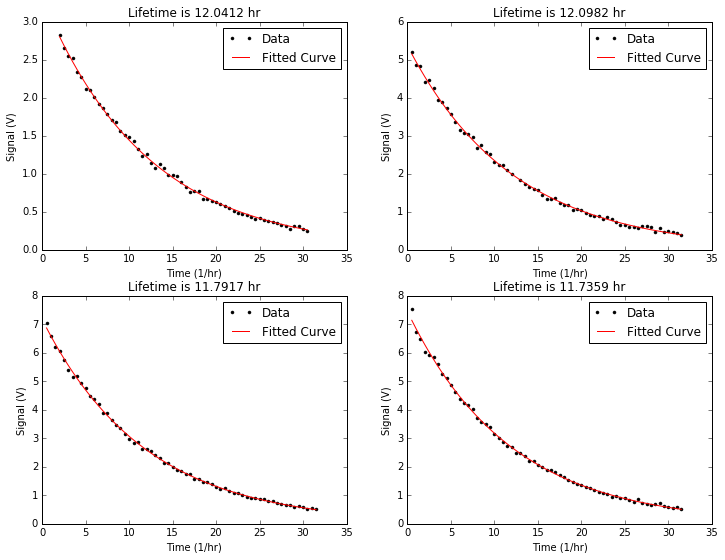

In [135]:
fig, axes = plt.subplots(2,2,figsize=(12,9))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        index = i * len(row) + j
        x, y = dfs[index]['time'], dfs[index]['signal']
        popt, pcov = curve_fit(exp_fit, x, y)
        ax.plot(x, y, 'ko', markersize=3, label='Data')
        ax.plot(x, exp_fit(x, *popt), 'r-', label='Fitted Curve')
        ax.legend()
        ax.set_xlabel('Time (1/hr)')
        ax.set_ylabel('Signal (V)')
        ax.set_title('Lifetime is %.4f hr'% popt[1])